In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import PIL

import sys
sys.path.insert(0, '../scripts')

import stft_zoom, display
from util import fft_frequencies, find_nearest
import mappings
import pickle
import PIL
import IPython.display
import detect_musical_regions

/Library/Python/3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/Library/Python/3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
import lukin_todd

In [3]:
%load_ext line_profiler

In [4]:
y, sr = librosa.load('../data/example.wav', sr=44100)

In [5]:
def a():
    specs = lukin_todd.get_n_spectrograms(y, n=3)
    kernel = [16,32]
    entropies = lukin_todd.get_entropies(specs, kernel)
    multires_spec = lukin_todd.lukin_todd(specs, kernel, entropies)

In [6]:
%timeit a()

757 ms ± 29.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
#3.8s

In [9]:
%lprun -f lukin_todd.get_n_spectrograms lukin_todd.get_n_spectrograms(y, n=3)

In [8]:
specs = lukin_todd.get_n_spectrograms(y, n=3)
kernel = [4,16]
entropies = lukin_todd.get_entropies(specs, kernel)
multires_spec, res_map = lukin_todd.lukin_todd(specs, kernel, entropies)

In [11]:
# multires_spec = np.zeros(specs[2][0].shape)
# multires_spec = PIL.Image.fromarray(multires_spec)

# res_map = np.zeros(specs[2][0].shape)
# res_map = PIL.Image.fromarray(res_map)


# for i in range(0, entropies[0].shape[0]):
#     for j in range(0, entropies[0].shape[1]):
#         chosen_res = np.array([entropies[0][i,j], entropies[1][i,j], entropies[2][i,j]]).argmin()

#         [y_start_cs, y_stop_cs], [x_start_cs, x_stop_cs] = get_range([i,j], kernel, specs[chosen_res][1], specs[chosen_res][2])
#         chosen_res_subregion = specs[chosen_res][0][y_start_cs:y_stop_cs, x_start_cs:x_stop_cs]

#         [y_start_mr, y_stop_mr], [x_start_mr, x_stop_mr] = get_range([i,j], kernel, 4096, 1024)
#         chosen_res_subregion = PIL.Image.fromarray(chosen_res_subregion).resize((x_stop_mr - x_start_mr,y_stop_mr - y_start_mr))

#         res_map_subregion = PIL.Image.fromarray(np.ones([y_stop_mr - y_start_mr, x_stop_mr - x_start_mr]) * (chosen_res+1))
        
#         box = (x_start_mr, y_start_mr, x_stop_mr, y_stop_mr)
#         multires_spec.paste(chosen_res_subregion, box)
#         res_map.paste(res_map_subregion, box)

In [ ]:
plt.figure(figsize=[20,5])

plt.subplot(1,4,1)
plt.imshow(entropies[0], origin='lower', aspect='auto')

plt.subplot(1,4,2)
plt.imshow(entropies[1], origin='lower', aspect='auto')

plt.subplot(1,4,3)
plt.imshow(entropies[2], origin='lower', aspect='auto')

plt.subplot(1,4,4)
plt.imshow(librosa.amplitude_to_db(specs[2][0]), origin='lower', aspect='auto')

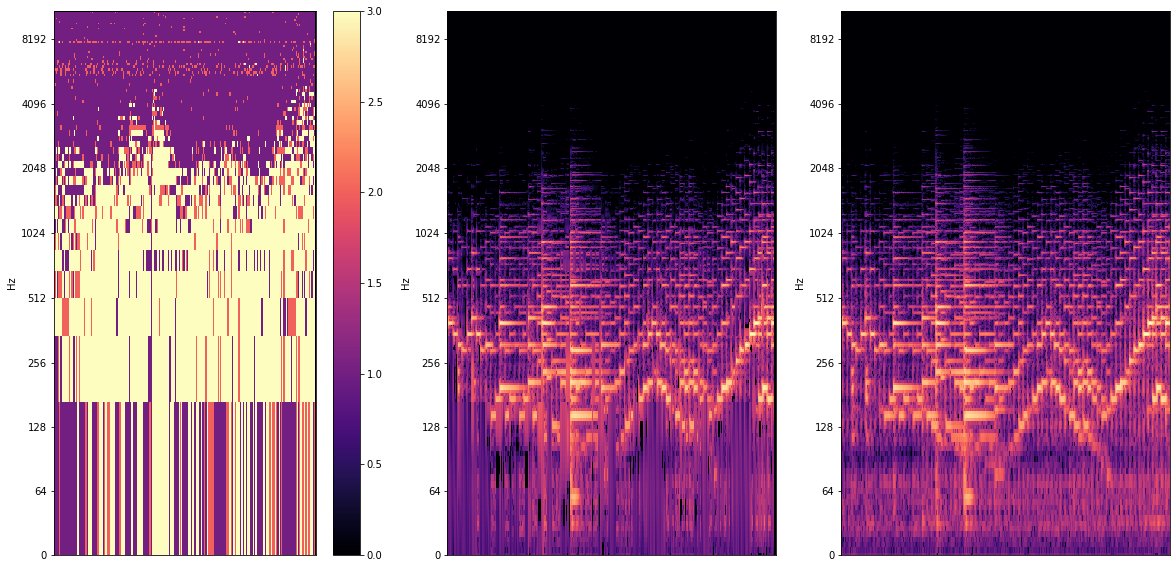

In [10]:
plt.figure(figsize=[20,10])

plt.subplot(1,3,1)
librosa.display.specshow(np.asarray(res_map), y_axis='log')
plt.colorbar()

plt.subplot(1,3,2)
librosa.display.specshow(librosa.power_to_db(np.asarray(multires_spec)), y_axis='log')

plt.subplot(1,3,3)
librosa.display.specshow(librosa.power_to_db(specs[2][0]), y_axis='log')